In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Google Colab
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive

# Load the dataset
data = pd.read_csv('./final_1/국민건강보험공단_건강검진정보_20221231.CSV', encoding='cp949')

Mounted at /content/drive/
/content/drive/My Drive


In [2]:
print(data)

        기준년도  가입자일련번호  시도코드  성별  연령대코드(5세단위)  신장(5cm단위)  체중(5kg단위)   허리둘레  \
0       2022   702763    41   2           14        160         75   89.0   
1       2022   765435    41   2            9        150         45   68.0   
2       2022   343621    41   2           13        150         60   78.8   
3       2022  3393534    41   2            6        160         50   69.0   
4       2022  1716951    41   2            7        160         55   75.0   
...      ...      ...   ...  ..          ...        ...        ...    ...   
999995  2022  2134210    43   1            6        170         90   98.8   
999996  2022  1686113    27   2           15        150         85  116.0   
999997  2022   902951    45   1           12        165         80   98.2   
999998  2022  3721315    47   1            6        175         65   75.4   
999999  2022  4901217    11   2           14        150         40   74.1   

        시력(좌)  시력(우)  ...  요단백  혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  흡연상

In [3]:
# 데이터 전처리
# 고혈압 여부에 영향이 없다고 생각되는 열(feautre)이나 결측치가 많은 열은 제거하기

# 삭제할 열 리스트
drop_column = ['기준년도','가입자일련번호','시도코드','성별', '연령대코드(5세단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','혈색소', '요단백', '혈청크레아티닌', '흡연상태', '음주여부','구강검진수검여부','치아우식증유무','치석']

# 열 삭제
data = data.drop(columns=drop_column)

print(data.head())

   신장(5cm단위)  체중(5kg단위)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
0        160         75  127.0   73.0        84.0     NaN       NaN       NaN   
1        150         45  127.0   75.0        85.0     NaN       NaN       NaN   
2        150         60  135.0   81.0       105.0     NaN       NaN       NaN   
3        160         50  109.0   70.0        81.0     NaN       NaN       NaN   
4        160         55  110.0   67.0        79.0     NaN       NaN       NaN   

   LDL콜레스테롤  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  
0       NaN        25.0        20.0   15.0  
1       NaN        19.0        10.0    7.0  
2       NaN        17.0        15.0   15.0  
3       NaN        25.0        16.0   13.0  
4       NaN        22.0        22.0   15.0  


<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-4-abcccc3ae21a>:17: UserWarning: Glyph 52629 (\N

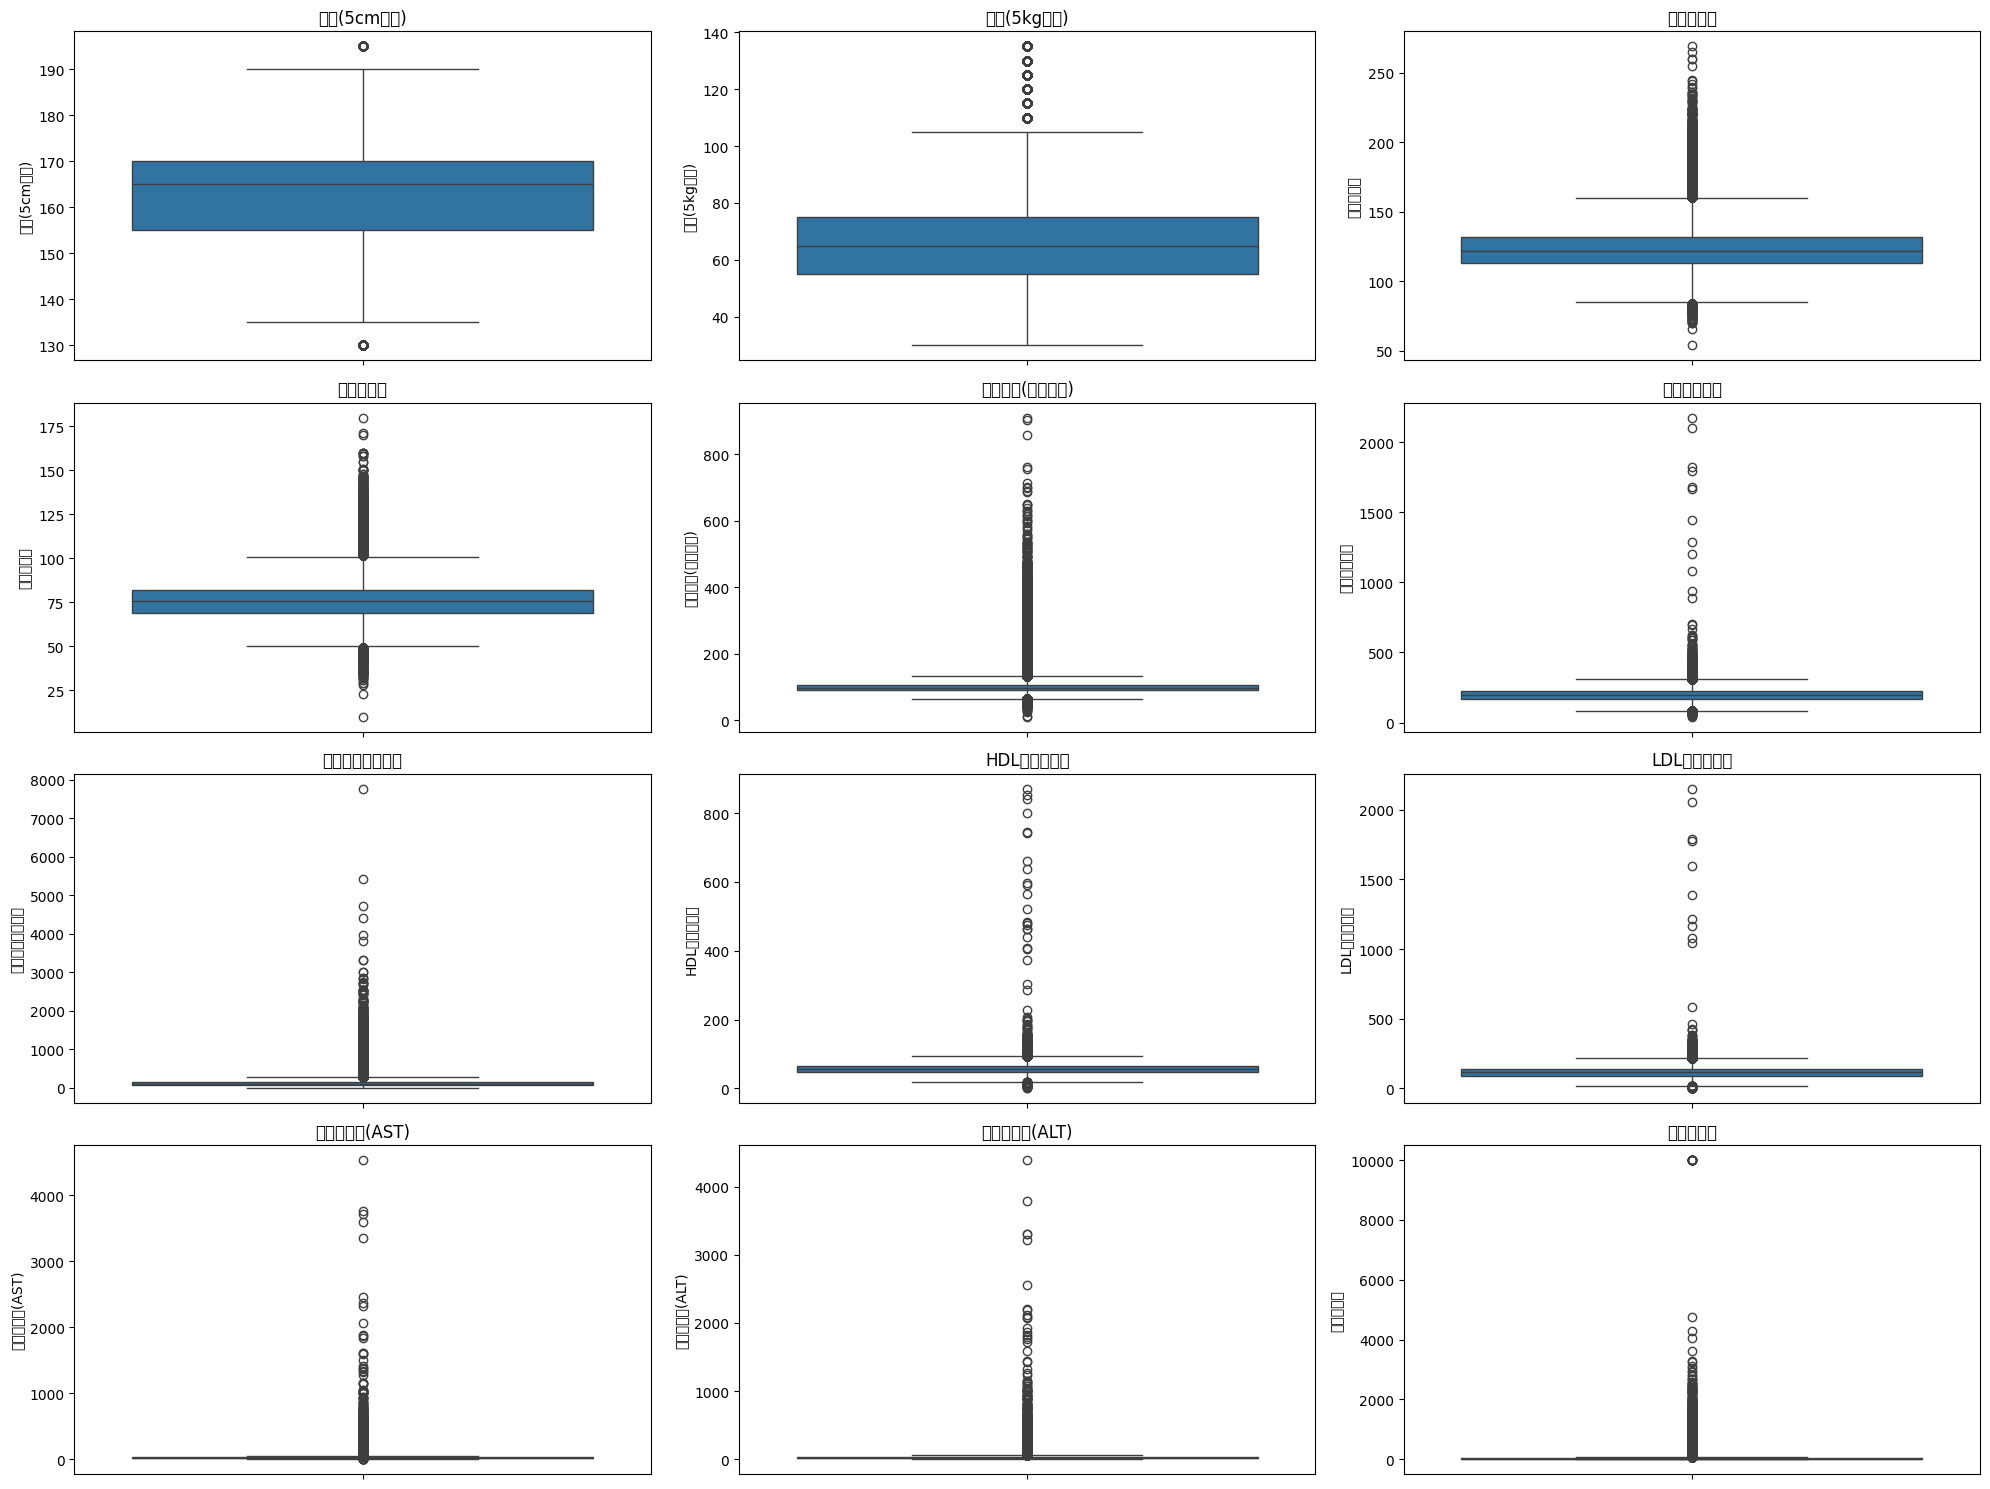

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['신장(5cm단위)', '체중(5kg단위)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
                   '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                   '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

# Boxplot 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [5]:
# 이상치 있는 행 없애기

# boxplot을 바탕으로 조건에 따라 행 제거
data = data[data['수축기혈압'] < 200]
data = data[(data['이완기혈압'] < 125) & (data['이완기혈압'] >= 30)]
data = data[data['식전혈당(공복혈당)'] < 200]
data = data[data['총콜레스테롤'] < 500]
data = data[data['트리글리세라이드'] < 1000]
data = data[data['HDL콜레스테롤'] < 200]
data = data[data['LDL콜레스테롤'] < 500]
data = data[data['혈청지오티(AST)'] < 500]
data = data[data['혈청지피티(ALT)'] < 500]
data = data[data['감마지티피'] < 1000]

print(data.head())

        신장(5cm단위)  체중(5kg단위)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  \
654336        165         60  118.0   68.0       103.0   243.0     120.0   
654337        175         70  128.0   80.0       102.0   241.0     139.0   
654338        160         55  132.0   72.0       110.0   218.0     108.0   
654339        155         70  169.0  107.0        91.0   209.0     140.0   
654340        165         60  115.0   66.0       104.0   157.0      72.0   

        HDL콜레스테롤  LDL콜레스테롤  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  
654336      85.0     134.0        22.0        17.0   34.0  
654337      50.0     163.0        22.0        22.0   23.0  
654338      42.0     154.0        22.0        15.0   17.0  
654339      78.0     103.0        21.0        12.0   29.0  
654340      73.0      70.0        22.0        19.0   20.0  


In [6]:
# 결측치 채우기
# categorical 변수는 most frequent value로 결측치 채움
# numeric 변수는 median으로 채우기
# 결측치를 중앙값으로 채울 열 이름 리스트
columns_to_fill = ['신장(5cm단위)', '체중(5kg단위)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
                   '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                   '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

# 각 열의 결측치를 중앙값으로 채우기
for column in columns_to_fill:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

print(data)

        신장(5cm단위)  체중(5kg단위)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  \
654336        165         60  118.0   68.0       103.0   243.0     120.0   
654337        175         70  128.0   80.0       102.0   241.0     139.0   
654338        160         55  132.0   72.0       110.0   218.0     108.0   
654339        155         70  169.0  107.0        91.0   209.0     140.0   
654340        165         60  115.0   66.0       104.0   157.0      72.0   
...           ...        ...    ...    ...         ...     ...       ...   
999995        170         90  128.0   84.0        88.0   245.0     150.0   
999996        150         85  136.0   81.0       134.0   240.0     108.0   
999997        165         80  119.0   83.0       181.0   205.0     191.0   
999998        175         65  109.0   60.0        91.0   178.0      61.0   
999999        150         40  137.0   87.0       173.0   170.0      88.0   

        HDL콜레스테롤  LDL콜레스테롤  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  
654336      85.0     134.0 

In [8]:
# 고혈압 여부를 판단하여 새로운 열 추가
data['고혈압여부'] = ((data['수축기혈압'] >= 140) | (data['이완기혈압'] >= 90)).astype(int)

print(data)

        신장(5cm단위)  체중(5kg단위)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  \
654336        165         60  118.0   68.0       103.0   243.0     120.0   
654337        175         70  128.0   80.0       102.0   241.0     139.0   
654338        160         55  132.0   72.0       110.0   218.0     108.0   
654339        155         70  169.0  107.0        91.0   209.0     140.0   
654340        165         60  115.0   66.0       104.0   157.0      72.0   
...           ...        ...    ...    ...         ...     ...       ...   
999995        170         90  128.0   84.0        88.0   245.0     150.0   
999996        150         85  136.0   81.0       134.0   240.0     108.0   
999997        165         80  119.0   83.0       181.0   205.0     191.0   
999998        175         65  109.0   60.0        91.0   178.0      61.0   
999999        150         40  137.0   87.0       173.0   170.0      88.0   

        HDL콜레스테롤  LDL콜레스테롤  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  고혈압여부  
654336      85.0    

In [9]:
# 데이터의 기술통계량
data.describe()

,신장(5cm단위),체중(5kg단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈청지오티(AST),혈청지피티(ALT),감마지티피,고혈압여부
count,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000,335294.000000
mean,162.393183,64.443727,124.490054,76.219730,100.755987,197.203114,122.205915,57.167296,115.552464,27.607336,27.094661,35.865912,0.162416
std,9.664529,13.483030,14.489160,10.060796,17.851584,41.444099,66.907133,14.692585,37.698153,15.487576,20.924661,44.543484,0.368832
min,130.000000,30.000000,66.000000,31.000000,10.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,155.000000,55.000000,115.000000,70.000000,90.000000,169.000000,74.000000,47.000000,89.000000,20.000000,16.000000,16.000000,0.000000
50%,160.000000,65.000000,124.000000,76.000000,97.000000,196.000000,105.000000,55.000000,114.000000,24.000000,21.000000,23.000000,0.000000
75%,170.000000,75.000000,134.000000,82.000000,107.000000,224.000000,152.000000,66.000000,140.000000,30.000000,31.000000,39.000000,0.000000
max,195.000000,135.000000,199.000000,124.000000,199.000000,472.000000,399.000000,199.000000,379.000000,497.000000,496.000000,999.000000,1.000000


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_0['신장(5cm단위)'].plot(kind='hist', bins=20, title='신장(5cm단위)')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_1['체중(5kg단위)'].plot(kind='hist', bins=20, title='체중(5kg단위)')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_2['수축기혈압'].plot(kind='hist', bins=20, title='수축기혈압')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50756 (\N{HANGUL SYLLABLE WAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_3['이완기혈압'].plot(kind='hist', bins=20, title='이완기혈압')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
 

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='신장(5cm단위)', y='체중(5kg단위)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  p

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='체중(5kg단위)', y='수축기혈압', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  pl

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='수축기혈압', y='이완기혈압', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50756 (\N{HANGUL SYLLABLE WAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  p

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='이완기혈압', y='식전혈당(공복혈당)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_8['신장(5cm단위)'].plot(kind='line', figsize=(8, 4), title='신장(5cm단위)')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_9['체중(5kg단위)'].plot(kind='line', figsize=(8, 4), title='체중(5kg단위)')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_10['수축기혈압'].plot(kind='line', figsize=(8, 4), title='수축기혈압')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50756 (\N{HANGUL SYLLABLE WAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
_df_11['이완기혈압'].plot(kind='line', figsize=(8, 4), title='이완기혈압')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335294 entries, 654336 to 999999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5cm단위)   335294 non-null  int64  
 1   체중(5kg단위)   335294 non-null  int64  
 2   수축기혈압       335294 non-null  float64
 3   이완기혈압       335294 non-null  float64
 4   식전혈당(공복혈당)  335294 non-null  float64
 5   총콜레스테롤      335294 non-null  float64
 6   트리글리세라이드    335294 non-null  float64
 7   HDL콜레스테롤    335294 non-null  float64
 8   LDL콜레스테롤    335294 non-null  float64
 9   혈청지오티(AST)  335294 non-null  float64
 10  혈청지피티(ALT)  335294 non-null  float64
 11  감마지티피       335294 non-null  float64
 12  고혈압여부       335294 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 35.8 MB


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabor

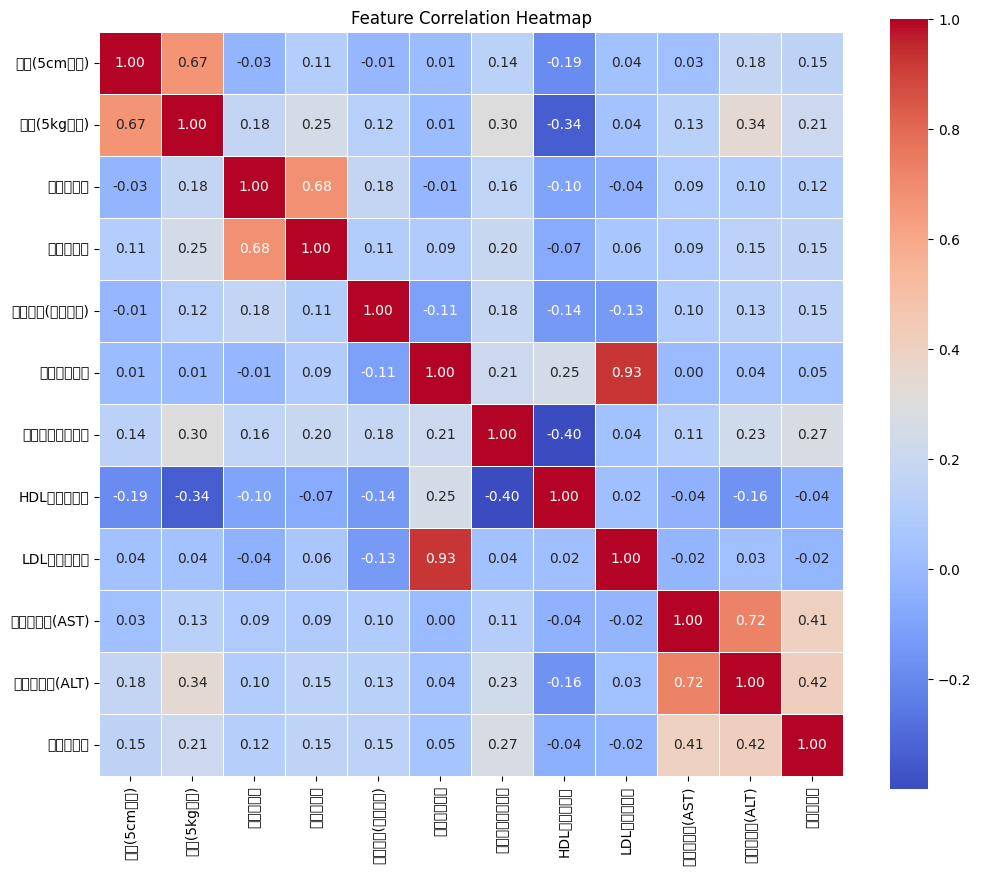

In [11]:
# feature의 관계보기
# heatmap
# 사용할 열 리스트
columns_to_plot = ['신장(5cm단위)', '체중(5kg단위)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
                   '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                   '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

# 해당 열들만 추출
data_subset = data[columns_to_plot]

# 상관계수 계산
corr_matrix = data_subset.corr()

# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-12-2f481144120f>:21: UserWarning: Glyph 5

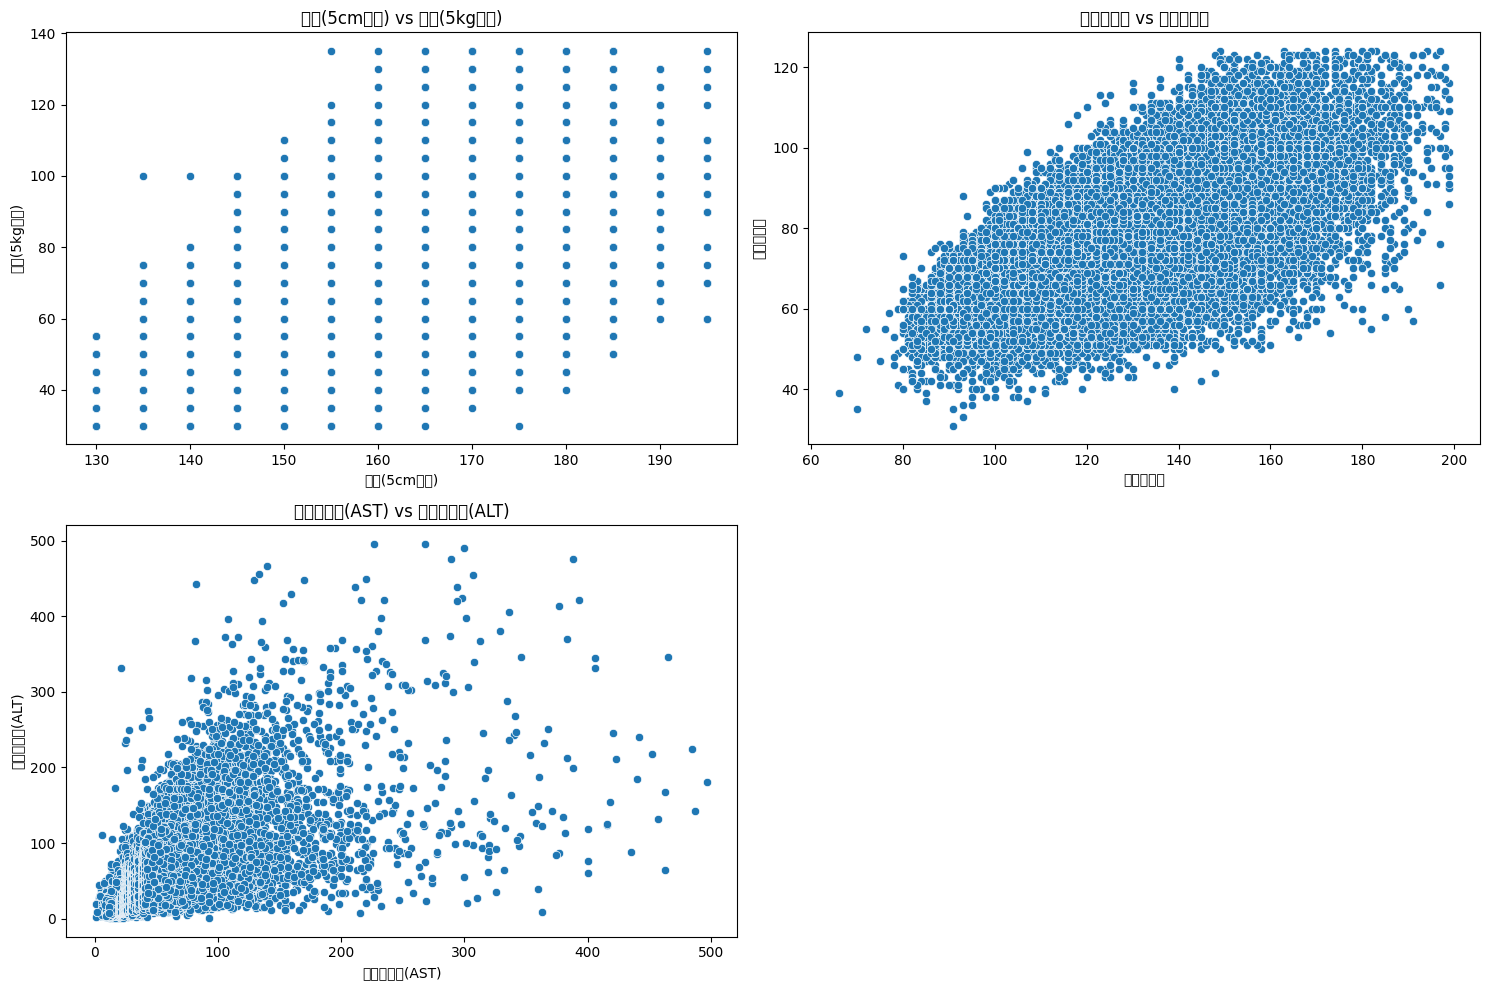

In [12]:
# 히트맵을 통행 신장(5cm단위)와 체중(5kg단위), 수축기혈압와 이완기혈압, 혈청지오티(AST)와 혈청지피티(ALT)가 관계가 높게 나옴
# 더 깊게 산점도를 통해 어떤 상관계수를 갖는지 확인하기
# 산점도 그리기
plt.figure(figsize=(15, 10))

# 신장(5cm단위)와 체중(5kg단위)
plt.subplot(2, 2, 1)
sns.scatterplot(x='신장(5cm단위)', y='체중(5kg단위)', data=data)
plt.title('신장(5cm단위) vs 체중(5kg단위)')

# 수축기혈압와 이완기혈압
plt.subplot(2, 2, 2)
sns.scatterplot(x='수축기혈압', y='이완기혈압', data=data)
plt.title('수축기혈압 vs 이완기혈압')

# 혈청지오티(AST)와 혈청지피티(ALT)
plt.subplot(2, 2, 3)
sns.scatterplot(x='혈청지오티(AST)', y='혈청지피티(ALT)', data=data)
plt.title('혈청지오티(AST) vs 혈청지피티(ALT)')

plt.tight_layout()
plt.show()

# 세 산점도 다 양의 상관관계를 가짐

In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# 독립 변수와 종속 변수 분리
X = data.drop(columns=['고혈압여부']).values  # 독립 변수
y = data['고혈압여부'].values  # 종속 변수

# XGBoost 모델 정의
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# cross_val_score를 사용하여 교차 검증 수행
cv_scores_f1 = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
cv_scores_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(model, X, y, cv=5, scoring='precision_macro')
cv_scores_recall = cross_val_score(model, X, y, cv=5, scoring='recall_macro')

# 평균과 표준편차, confusion matrix 계산
mean_f1 = cv_scores_f1.mean()
std_f1 = cv_scores_f1.std()
mean_accuracy = cv_scores_accuracy.mean()
std_accuracy = cv_scores_accuracy.std()
mean_precision = cv_scores_precision.mean()
std_precision = cv_scores_precision.std()
mean_recall = cv_scores_recall.mean()
std_recall = cv_scores_recall.std()
y_pred = cross_val_predict(model, X, y, cv=5)
confusion = confusion_matrix(y, y_pred)

# 결과 출력
print(f"Macro F1-score: 평균 {mean_f1:.3f} , 표준편차 {std_f1:.3f}")
print(f"Accuracy: 평균 {mean_accuracy:.3f} , 표준편차 {std_accuracy:.3f}")
print(f"Macro Precision: 평균 {mean_precision:.3f} , 표준편차 {std_precision:.3f}")
print(f"Macro Recall: 평균 {mean_recall:.3f}, 표준편차 {std_recall:.3f}")
print("Confusion Matrix:\n",confusion)

Macro F1-score: 평균 1.000 , 표준편차 0.000
Accuracy: 평균 1.000 , 표준편차 0.000
Macro Precision: 평균 1.000 , 표준편차 0.000
Macro Recall: 평균 1.000, 표준편차 0.000
Confusion Matrix:
 [[280837      0]
 [     0  54457]]
